*Thinkful Data Science Prep Course Capstone*

Name: Benjamin Schechner

Mentor: Jefferson Heard


    

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

patient_data = pd.DataFrame()
patient_data = pd.read_csv('./No-show-Issue-Comma-300k 2.csv')

patient_data.head()

,Age,Gender,AppointmentRegistration,ApointmentData,DayOfTheWeek,Status,Diabetes,Alcoolism,HiperTension,Handcap,Smokes,Scholarship,Tuberculosis,Sms_Reminder,AwaitingTime
0,19,M,2014-12-16T14:46:25Z,2015-01-14T00:00:00Z,Wednesday,Show-Up,0,0,0,0,0,0,0,0,-29
1,24,F,2015-08-18T07:01:26Z,2015-08-19T00:00:00Z,Wednesday,Show-Up,0,0,0,0,0,0,0,0,-1
2,4,F,2014-02-17T12:53:46Z,2014-02-18T00:00:00Z,Tuesday,Show-Up,0,0,0,0,0,0,0,0,-1
3,5,M,2014-07-23T17:02:11Z,2014-08-07T00:00:00Z,Thursday,Show-Up,0,0,0,0,0,0,0,1,-15
4,38,M,2015-10-21T15:20:09Z,2015-10-27T00:00:00Z,Tuesday,Show-Up,0,0,0,0,0,0,0,1,-6


While on [Kaggle](https://www.kaggle.com), I came across a patient appointment data set ([here]( (https://www.kaggle.com/joniarroba/noshowappointments)). It has over 300,000 patients as well as information about the appointment date and several binary health indicators about each patient. It posed a question, "Why do 30% of patients miss their appointments?"


And that was it. There was no additional context about where this data came from or if the health indicators were from the doctor's records or self reported. There was no description about even what country this data was from. Furthermore, there were clear typos in the column headings such as "Alcoolism" and "HiperTension" but nonetheless,I got curious about this dataset of over 300,000 people - why do **30%** of patients **miss** their appointments? 

I intended to find out. 

After all, missed doctor appointments are a huge deal in the US. It is estimated by Healthcare industry professionals that missed appointments cost the US over \$150 billion  per year or between \$100 and \$1000 per patient depending on location and specialty of the practice ([source 1](http://www.healthcarefinancenews.com/blog/insight-tackling-healthcares-costly-problem-missed-appointments), [source 2](https://www.everseat.com/blog/missed-appointments-affect-more-than-just-revenue/)). These estimates are in revenue and are not including the extra cost of staff trying to track down these patients for future appointments. 

Hospital systems recognize this huge attrition problem and are trying to get to the bottom of why patients are missing appointments. When asked, patients say that they simply forget that they had an appointment ([source 3](http://bmcfampract.biomedcentral.com/articles/10.1186/1471-2296-6-47)). Therefore, hospital systems are trying to address this forgetfulness problem using various automated reminder systems, including text message reminders, similar to the SMS reminders in our dataset. But do these reminders have an impact? 

I first wanted to know more about the dataset - Who are these patients? What are their median ages? Is their overall health representative of the United States or perhaps of a different country all together?

Secondly, I wanted to know more about these missed appointments - was there a certain day that had more missed appointments? Did age matter? What, if any, trends could I find relating to these missed appointments. 

Thirdly, what was the impact of these text message reminders? Unfortunately, we do not have any context regarding these text messages, such as what the text messages said or when they were sent in relation to a patient's appointment date. That being said, did simply receiving a text message affect the rate of showing up to an appointment?

So to summarize:

1. Are the patients in this data set representative of the general United States patient population or perhaps representative of a different country's patient population?
2. Do the variables "Days Of The Week", "Age" or "Days Scheduled in Advance" contribute to missing an appointment?
3. Did receiving a text message affect a patient's ability to show up?


# Who Are the Patients?

The Average Age is 37 years
The standard deviation is 22 years


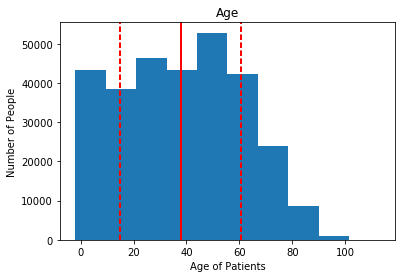

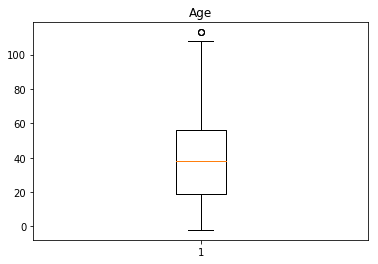

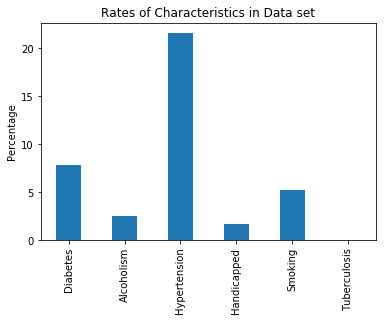

The rates of different health Characteristics:
7.80%
2.50%
21.59%
1.70%
5.24%
0.04%


In [16]:
patient_age = patient_data['Age']
print("The Average Age is " + str(int(patient_age.mean()))+" years")
print("The standard deviation is "+ str(int(patient_age.std()))+ " years")
plt.hist(patient_age)
plt.xlabel('Age of Patients')
plt.ylabel('Number of People')
plt.title('Age')
plt.axvline(patient_age.mean(), color='r', linestyle='solid', linewidth=2)
plt.axvline(patient_age.mean() + patient_age.std(), color='r', linestyle='dashed', linewidth=2)
plt.axvline(patient_age.mean() - patient_age.std(), color='r', linestyle='dashed', linewidth=2)
plt.show()

plt.boxplot(patient_age)
plt.title('Age')
plt.show()


diabetic_patients = patient_data[patient_data['Diabetes']==1]
diabetes_rate_intermediate = diabetic_patients.count()/patient_data.count()*100
diabetes_rate = float(diabetes_rate_intermediate['Diabetes'])

alcoholic_patients = patient_data[patient_data['Alcoolism']==1]
alcoholic_rate_intermediate = alcoholic_patients.count()/patient_data.count()*100
alcoholic_rate = float(alcoholic_rate_intermediate['Alcoolism'])

hypertension_patients = patient_data[patient_data['HiperTension']==1]
hypertension_rate_intermediate = hypertension_patients.count()/patient_data.count()*100
hypertension_rate = float(hypertension_rate_intermediate['HiperTension'])

handicap_patients = patient_data[patient_data['Handcap']==1]
handicap_rate_intermediate = handicap_patients.count()/patient_data.count()*100
handicap_rate = float(handicap_rate_intermediate['Handcap'])

smoke_patients = patient_data[patient_data['Smokes']==1]
smoke_rate_intermediate = smoke_patients.count()/patient_data.count()*100
smoke_rate = float(smoke_rate_intermediate['Smokes'])

tuber_patients = patient_data[patient_data['Tuberculosis']==1]
tuber_rate_intermediate = tuber_patients.count()/patient_data.count()*100
tuber_rate = float(tuber_rate_intermediate['Tuberculosis'])

patient_rates = (diabetes_rate, alcoholic_rate, hypertension_rate, handicap_rate, smoke_rate, tuber_rate)
bar_range = np.arange(6)

plt.bar(bar_range, patient_rates, 0.45)
plt.xticks(bar_range, ('Diabetes', 'Alcoholism', 'Hypertension','Handicapped', 'Smoking', 'Tuberculosis'), rotation= 'vertical')
plt.ylabel('Percentage')
plt.title('Rates of Characteristics in Data set')
plt.show()

print('The rates of different health Characteristics:')
for items in patient_rates:
    print ("{0:.2f}".format(items)+" %")

As shown in the histogram, the Median age for the data set is 37 years old with a standard deviation of 22.8 years. As noted in the following box plot, most of the patients fall within the Inter Quartile Range (IQR). The only outliers are the patients who lived over 105 which is consistent with the typical human being population dataset. 

Additionally, as noted in the bar graph, the population in the dataset had the following rates:

- Diabetes: 7.80%
- Alcoholism: 2.50%
- Hypertension: 21.59%
- Handicapped: 1.70%
- Smoking: 5.24%
- Tuberculosis: 0.04%

When comparing these rates to the US population:

- Diabetes: 9.3% ([CDC](https://www.cdc.gov/diabetes/data/statistics/2014statisticsreport.html))
- Alcoholism: 6.0% ([CDC](https://www.cdc.gov/alcohol/data-stats.htm))
- HyperTension: 29.1% [CDC](https://www.cdc.gov/nchs/products/databriefs/db133.htm))
- Handicapped: 19.1% ([CDC](https://www.cdc.gov/media/releases/2015/p0730-us-disability.html))
- Smoking: 15% ([CDC](https://www.cdc.gov/tobacco/data_statistics/fact_sheets/adult_data/cig_smoking/))
- Tuberculosis: 0.003% ([CDC](https://www.cdc.gov/tb/publications/factsheets/statistics/tbtrends.htm))

It becomes clear that this population is not representative of a typical United States medical population, but perhaps is more representative of a different country. 




# Trends on Missed Appointments


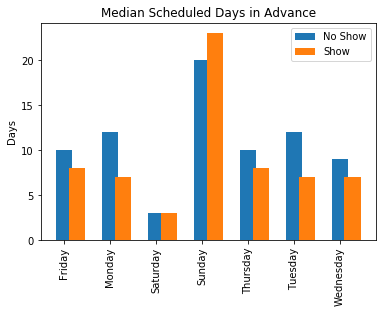

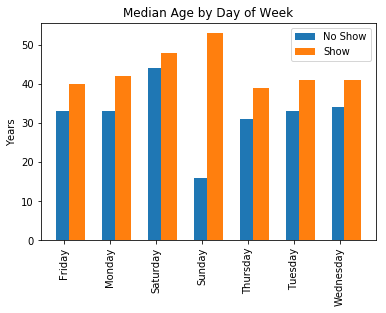

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
counts for each day
DayOfTheWeek
Friday       36525
Monday       40245
Saturday       880
Sunday           5
Thursday     42412
Tuesday      44626
Wednesday    44576
Name: Age, dtype: int64
 
DayOfTheWeek
Friday       16246
Monday       19053
Saturday       513
Sunday           1
Thursday     17850
Tuesday      18149
Wednesday    18919
Name: Age, dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


In [20]:
patient_no_show = patient_data[patient_data['Status']=="No-Show"]
patient_show = patient_data[patient_data['Status']=="Show-Up"]

day_split_show = patient_show.groupby('DayOfTheWeek').median()
day_split_no_show = patient_no_show_sorted.groupby('DayOfTheWeek').median()

day_bar = np.arange(7)
plt.bar(day_bar, day_split_no_show['AwaitingTime'].abs(), 0.35, label='No Show')
plt.bar(day_bar+0.28, day_split_show['AwaitingTime'].abs(),0.35, label = 'Show')
plt.xticks(day_bar,('Friday', 'Monday', 'Saturday','Sunday', 'Thursday', 'Tuesday', 'Wednesday'), rotation= 'vertical')
plt.ylabel('Days')
plt.title('Median Scheduled Days in Advance')
plt.legend()
plt.show()

day_bar = np.arange(7)
plt.bar(day_bar, day_split_no_show['Age'], 0.35, label='No Show')
plt.bar(day_bar+0.28, day_split_show['Age'],0.35, label = 'Show') ##prob need to do .sort
plt.xticks(day_bar,('Friday', 'Monday', 'Saturday','Sunday', 'Thursday', 'Tuesday', 'Wednesday'), rotation= 'vertical')
plt.ylabel('Years')
plt.title('Median Age by Day of Week')
plt.legend()
plt.show()

show_day_counts=patient_show.groupby('DayOfTheWeek').count()
no_show_day_counts=patient_no_show.groupby('DayOfTheWeek').count()

print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
print("counts for each day")
print(show_day_counts['Age'])
print(" ")
print(no_show_day_counts['Age'])
print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")



 In the first bar graph, it is clear that the appointments that were made farther in advance were typically missed more often, with the largest differences seen between the weekdays (M-F) and the weekend (Sat, Sun)

In the second bar graph, it is clear that the older a patient is, the less likely they are to miss an appointment, with the largest difference between the Ages of the "Show" and "No-Show" population occuring on Sundays. 

But this difference in Age is greater than 20 years or one whole standard deviation of the actual population. As a result, I wanted to explore the data to make sure I was not using a skewed sample for my Sunday Group. As the next table of counts shows, there is a huge discrepancy in the number of patients in my sample for the Sunday group (5 for the Sunday Show and 1 for the Sunday No-Show), leading to a biased or skewed sample group for Sunday. Additionally, the Saturday population is too small a sample as it is only 800 shows and 500 no shows to be compared to the relative WeekDay populations (~36,000 shows and 16,000 no shows per day) 

This lends me to believe that the sampled doctor clinic must be closed on Sundays and potentially only open for a partial day on Saturday. As a result, the Sunday and Saturday group should be ignored for future day analysis as they are skewed.

Now as I saw a trend between the older patients showing up for more of their appointments as well as a trend for appointments made closer to the actual date, I wanted to see if there was any connection between Age and Appointment Times as noted in the scatter plot. 

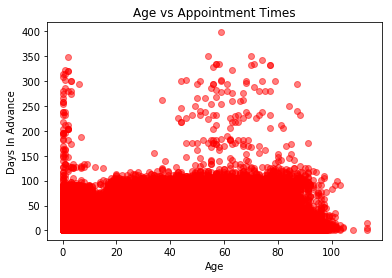

In [169]:
plt.scatter(x=patient_data['Age'].abs(), y=patient_data['AwaitingTime'].abs(), color='red', alpha=0.5)
plt.xlabel('Age')
plt.ylabel('Days In Advance')
plt.title('Age vs Appointment Times')
plt.show()

The Scatter plot shows that regardless of Age, most appointments are scheduled within 100 days of the actual appointment. That being said, the scatter plot highlights two distinct groups that stray from this 100 day mark. One group are patients under the age of 5 and the other group are patients between the ages of 45 and 80 years old. 

In terms of future research, it would be important to dive deeper into these two different populations to see what, if any, factors drive them to deter away from the 100 day norm and if these factors contribute to their rate of showing up for an appointment. Additionally, when looking at the population under the Age of 5, it would be important to take into account any cultural norms regarding pre-natal health and parenting as the parents will largely influence when these appointments are made and if the patient shows up for them as there is a lack of agency in patients under 5 years old. 

Knowing these potential factors for each age group or segment could optimize the scheduling process by potentially only allowing appointment slots that fit a specific segment's optimial show up rate (i.e perhaps patients over the age of 45 who also smoke are the only patients allowed to make appointments over 200 days in advance)


# SMS Reminder Effects

The Rates:
Show Text: 69.7938518874
No Show Text: 30.2061481126
Show No Text: 69.7270259127
No Show No Text: 30.2729740873


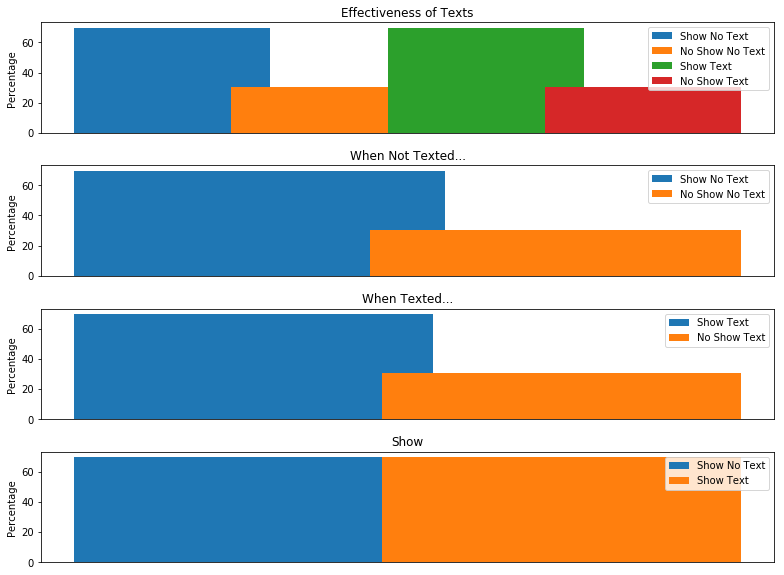

In [22]:
patient_no_text = patient_data[patient_data['Sms_Reminder']==0]
patient_text = patient_data[patient_data['Sms_Reminder']==1]
no_show_patient_no_text = patient_no_text[patient_no_text['Status']=='No-Show']
no_show_patient_no_text_rate= (no_show_patient_no_text['Age'].count()/patient_no_text['Age'].count())*100

show_patient_no_text = patient_no_text[patient_no_text['Status']=='Show-Up']
show_patient_no_text_rate=(show_patient_no_text['Age'].count()/patient_no_text['Age'].count())*100

no_show_patient_text = patient_text[patient_text['Status']=='No-Show']
no_show_patient_text_rate=(no_show_patient_text['Age'].count()/patient_text['Age'].count())*100

show_patient_text = patient_text[patient_text['Status']=='Show-Up']
show_patient_text_rate=(show_patient_text['Age'].count()/patient_text['Age'].count())*100

print('The Rates:')
print('Show Text: '+ str(show_patient_text_rate))
print('No Show Text: '+ str(no_show_patient_text_rate))
print('Show No Text: ' + str(show_patient_no_text_rate))
print('No Show No Text: ' + str(no_show_patient_no_text_rate))


plt.figure(figsize=(11,10))
plt.subplot(5,1,1)
plt.bar(1, show_patient_no_text_rate, 0.35, label='Show No Text')
plt.bar(1+0.28, no_show_patient_no_text_rate,0.35, label = 'No Show No Text')
plt.bar(1+(0.28*2), show_patient_text_rate,0.35, label = 'Show Text')
plt.bar(1+(0.28*3), no_show_patient_text_rate,0.35, label = 'No Show Text')

plt.xticks([])
plt.ylabel('Percentage')
plt.title('Effectiveness of Texts')
plt.legend()

plt.subplot(5,1,2)
plt.bar(1, show_patient_no_text_rate, 0.35, label='Show No Text')
plt.bar(1+0.28, no_show_patient_no_text_rate,0.35, label = 'No Show No Text')
plt.xticks([])
plt.ylabel('Percentage')
plt.title('When Not Texted...')
plt.legend()

plt.subplot(5,1,3)
plt.bar(1, show_patient_text_rate,0.35, label = 'Show Text')
plt.bar(1+0.3, no_show_patient_text_rate,0.35, label = 'No Show Text')
plt.xticks([])
plt.ylabel('Percentage')
plt.title('When Texted...')
plt.legend()

plt.subplot(5,1,4)
plt.bar(1, show_patient_no_text_rate, 0.35, label='Show No Text')
plt.bar(1+0.3, show_patient_text_rate,0.35, label = 'Show Text')
plt.xticks([])
plt.ylabel('Percentage')
plt.title('Show')
plt.legend()

plt.tight_layout()
plt.show()


To explore the effectivenss of the text reminder, I wanted to look at the population of those that received the text reminder and their rate of making appointments and compare this to the baseline rates created by the control group, or those patients who did not receive a text. 


When looking at all four populations, there is a clear difference between the rate at which patients show up to appointments and the rate at which patients do not show up. However, when looking at the Show Bar Graph, texting is not the reason for these differences. People showed up at a rate of 69.79% when texted and they showed up at a rate of 69.72% when not texted, this difference is not statistically significant. 


If the text reminder was effective, I should have saw a statistically significant increase in the rate at which people showed up for their appointment in the texting group, but instead, I saw relatively the same rate of patients showing up for appointments, regardless of receiving a text reminder. 


That being said, there might be a select population within this patient dataset, such as the patients who are smokers between the ages of 20-35 perhaps, that do respond to the text reminders. This type of hypothesis requires further research into the data and is important to explore in order to optimize the cost of sending text reminders with the benefit of having more patients show up for their appointments.
 

# Conclusion

In Conclusion, based on the average ages and standard deviations, as well as the rates of several different health characteristics, such as the rate of Diabetes in the dataset, the patients in the dataset were pretty typical of a general population and not of a specialized clinic. 

In terms of what factors influence a patient showing up for an appointment, we were not able to analyze days of the week, specifically weekday vs weekend, as there was not a large enough sample for the Saturday and Sunday populations, relative to the weekday populations. 

That being said, regarding the Age and Days Scheduled factors, generally, the older the patient and the lower the days scheduled in advance, the higher the chance of the patient showing up for an appointment. 

Regarding the effectiveness of text reminders, we were able to conclude based on the rate of the Text population vs the rate of the No text population showing up for their appointments, that the text message reminders were not effective when broadly used for all patients. However, there is still potential that the text message reminders are effective for specific segments within the population and this will be explored in a future study. 